In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

sns.set_style('white')

# df_run
df = pd.read_pickle('df_run.p')

In [2]:
df.shape

(129, 11)

In [3]:
df.head()

,id,athlete_count,distance,avg_speed,avg_hr,type,elevation_gain,latlng,pace,duration,zone
date,,,,,,,,,,,
2017-07-07 18:00:38,1176094669,1,5022.2,2.589,NaN,Run,21.9,"(55.95, -3.19)",6.437492,32.333333,NaN
2017-07-05 17:50:32,1173071844,1,4977.9,2.469,148.3,Run,20.5,"(55.95, -3.19)",6.750371,33.600000,2.0
2017-07-01 16:30:48,1173071487,1,2889.1,2.586,160.1,Run,20.4,"(55.95, -3.19)",6.444960,18.616667,3.0
2017-06-28 19:55:15,1163118846,1,414.8,2.942,NaN,Run,0.0,"(55.95, -3.19)",5.665080,2.350000,NaN
2017-06-28 19:30:59,1163118747,1,2732.6,2.598,NaN,Run,75.0,"(55.96, -3.16)",6.415191,17.533333,NaN


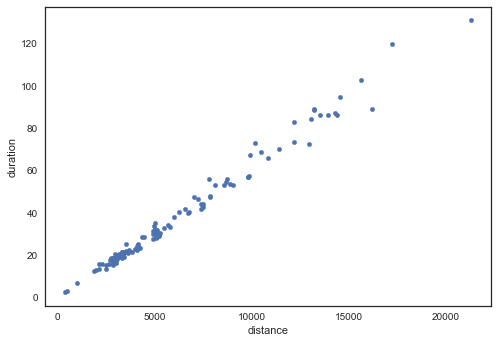

In [5]:
# plot distance vs time, date as alpha
df.plot.scatter(x='distance', y='duration')

In [12]:
for row in df.iterrows():
    a = row

In [66]:
year_min = df.index.min().year
month_min = df.index.min().month
day_min = df.index.min().day

print('{} {} {}'.format(year_min, month_min, day_min))

2016 3 4


In [68]:
year_max = df.index.max().year
month_max = df.index.max().month
day_max = df.index.max().day

print('{} {} {}'.format(year_max, month_max, day_max))

2017 7 7


In [69]:
# Find time range
# 1. Convert to seconds
time_min = year_min * 31536000 + month_min * 2.592e+6 + day_min * 24 * 60 * 60
time_max = year_max * 31536000 + month_max * 2.592e+6 + day_max * 24 * 60 * 60

In [71]:
time_range = time_max - time_min
time_range

42163200.0

In [72]:
def convert_to_seconds(datetime):
    
    year = datetime.year
    month = datetime.month
    day = datetime.day
    
    time = year * 31536000 + month * 2.592e+6 + day * 24 * 60 * 60
    return time - time_min

C:\Users\brian1123\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


(0, 60)

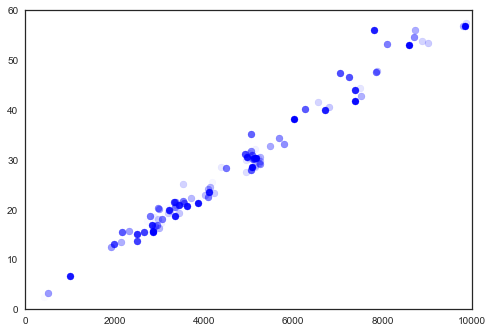

In [90]:
for row in df.iterrows():
    alpha = 1 - convert_to_seconds(row[0].to_datetime()) / time_range
    plt.scatter(x=row[1]['distance'], y=row[1]['duration'], alpha=alpha, color='blue')

# not showing very well

In [98]:
df['Month']=df['Date'].apply(lambda x: x[:7])

TypeError: 'Timestamp' object is not subscriptable

In [99]:
# Add a col for cumulated distance, 0 starting from first of a month
df['cum_distance'] = df.groupby(df.index.month)['distance'].cumsum()

In [ ]:
# TODO